In [ ]:
!wget -O data.zip https://www.dropbox.com/s/9w8nmj791c9ogsx/data_upload_v3.zip?dl=1

--2021-07-12 13:05:51--  https://www.dropbox.com/s/9w8nmj791c9ogsx/data_upload_v3.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/9w8nmj791c9ogsx/data_upload_v3.zip [following]
--2021-07-12 13:05:51--  https://www.dropbox.com/s/dl/9w8nmj791c9ogsx/data_upload_v3.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaa389fb25371a69995974fe6ba.dl.dropboxusercontent.com/cd/0/get/BSL7QaS6SAPeukkGI1LWBB1j0_gaXfnUjK2YT0AKvKlA2S28xsYSbB8NOZ6qLYBxPt9rIk5NPA9ty7JbeRYJzww4bkAJkqken5AMPkkUH3HODb54BEgn2EcFYPnwI1LtIZHpNNhSXgNP7OMPNQbCTFCY/file?dl=1# [following]
--2021-07-12 13:05:52--  https://ucaa389fb25371a69995974fe6ba.dl.dropboxusercontent.com/cd/0/get/BSL7QaS6SAPeukkGI1LWBB1j0_gaXfnUjK2YT0AKvKlA2S28xsYSbB8NOZ6qLYBxPt9rIk

In [ ]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data_upload_v3/test/non/Atelectasis/patient04316-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04347-study7-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04382-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04437-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04466-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04689-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04733-study7-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04773-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04773-study4-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04826-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient049

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 20
LEARNING_RATE = 0.0001
MOMENTUM = 0.9
EPOCHS = 100

train_data_dir = "data_upload_v3/train"
test_data_dir = "data_upload_v3/test"

[2000, 84]

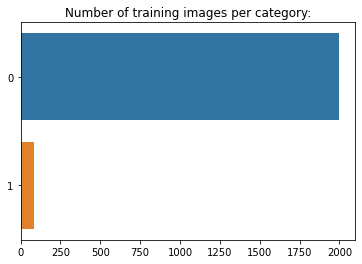

In [ ]:
import os

category_names = sorted(os.listdir(train_data_dir))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = train_data_dir + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")
img_pr_cat

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from glob import glob

images = glob("data_upload_v3/train/1/*")
datagen = ImageDataGenerator(
    brightness_range=(0.4, 0.6),
    horizontal_flip=True
)

for image in images:
    img = load_img(image)  
    x = img_to_array(img)
    x = x.reshape((1, ) + x.shape)  

    it = datagen.flow(x, batch_size=1, save_to_dir='data_upload_v3/train/1', save_prefix='covid', save_format='jpeg')
    for i in range(5):
      it.next()

In [ ]:
train_datagen = ImageDataGenerator(
    brightness_range=(0.4, 0.6),
    horizontal_flip=True
)

test_datagen =  ImageDataGenerator(
    brightness_range=(0.4, 0.6),
    horizontal_flip=True
)

print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE, 
    class_mode="binary",
    shuffle=True
)

print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE, 
    class_mode="binary",
    shuffle=True
)

Total number of images for "training":
Found 2496 images belonging to 2 classes.
Total number of images for "testing":
Found 3100 images belonging to 2 classes.


In [ ]:
!rm -r data_upload_v3/train/.ipynb_checkpoints

rm: cannot remove 'data_upload_v3/train/.ipynb_checkpoints': No such file or directory


In [ ]:
!rm -r data_upload_v3/test/.ipynb_checkpoints

rm: cannot remove 'data_upload_v3/test/.ipynb_checkpoints': No such file or directory


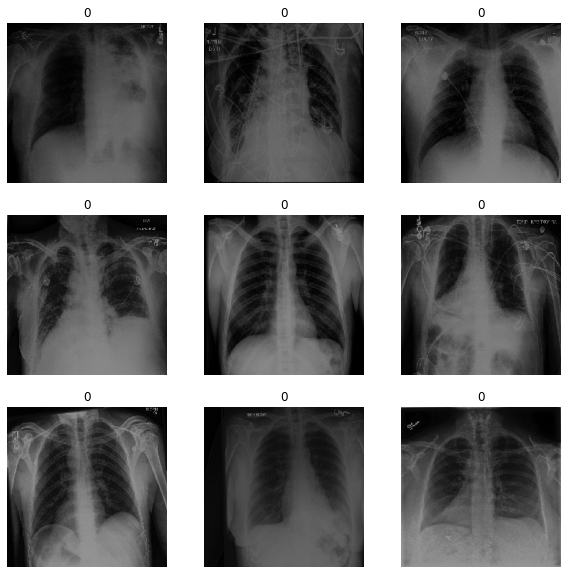

In [ ]:
class_names = list(train_generator.class_indices.keys())
images, labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype("uint8"))
    plt.title(class_names[int(labels[i])])
    plt.axis("off")

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                            include_top=False,
                                            weights='imagenet')

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
preprocess_input = tf.keras.applications.resnet50.preprocess_input
image_batch, label_batch = next(train_generator)
preprocess_batch = preprocess_input(image_batch)
print(preprocess_batch.shape)

(20, 224, 224, 3)


In [ ]:
feature_batch = base_model(preprocess_batch)
print(feature_batch.shape)

(20, 7, 7, 2048)


In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(20, 2048)


In [ ]:
prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(20, 1)


In [ ]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
metrics = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.SensitivityAtSpecificity(0.2, name='SensitivityAtSpecificity'),
      tf.keras.metrics.SpecificityAtSensitivity(0.2, name='SpecificityAtSensitivity')
]

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=metrics)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 224, 224, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049  

In [ ]:
initial_results = model.evaluate(test_generator)
print("initial results:")
for name, value in zip(model.metrics_names, initial_results):
  print(name, ': ', value)

155/155 [==============================] - 33s 194ms/step - loss: 2.7899 - tp: 99.0000 - fp: 3000.0000 - tn: 0.0000e+00 - fn: 1.0000 - accuracy: 0.0319 - precision: 0.0319 - recall: 0.9900 - SensitivityAtSpecificity: 0.4200 - SpecificityAtSensitivity: 0.4740
initial results:
loss :  2.789890766143799
tp :  99.0
fp :  3000.0
tn :  0.0
fn :  1.0
accuracy :  0.03193548321723938
precision :  0.031945787370204926
recall :  0.9900000095367432
SensitivityAtSpecificity :  0.41999998688697815
SpecificityAtSensitivity :  0.4740000069141388


In [ ]:
class_weight = {0: 2494/4000, 1: 2494/988}
class_weight

{0: 0.6235, 1: 2.5242914979757085}

In [ ]:
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=test_generator,
                    class_weight=class_weight)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/50
125/125 [==============================] - 68s 500ms/step - loss: 0.4452 - tp: 402.0000 - fp: 374.0000 - tn: 1626.0000 - fn: 94.0000 - accuracy: 0.8125 - precision: 0.5180 - recall: 0.8105 - SensitivityAtSpecificity: 0.9839 - SpecificityAtSensitivity: 0.9920 - val_loss: 0.1080 - val_tp: 85.0000 - val_fp: 43.0000 - val_tn: 2957.0000 - val_fn: 15.0000 - val_accuracy: 0.9813 - val_precision: 0.6641 - val_recall: 0.8500 - val_SensitivityAtSpecificity: 0.9900 - val_SpecificityAtSensitivity: 1.0000
Epoch 2/50
125/125 [==============================] - 62s 494ms/step - loss: 0.1274 - tp: 483.0000 - fp: 75.0000 - tn: 1925.0000 - fn: 13.0000 - accuracy: 0.9647 - precision: 0.8656 - recall: 0.9738 - SensitivityAtSpecificity: 1.0000 - SpecificityAtSensitivity: 1.0000 - val_loss: 0.0762 - val_tp: 89.0000 - val_fp: 37.0000 - val_tn: 2963.0000 - val_fn:

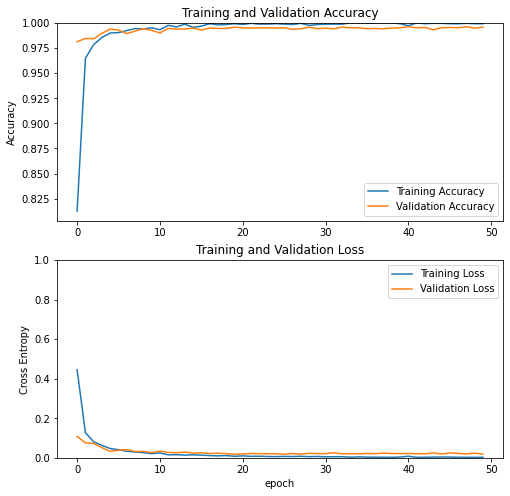

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
results = model.evaluate(test_generator)
print("final results:")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)

155/155 [==============================] - 30s 194ms/step - loss: 0.0215 - tp: 90.0000 - fp: 7.0000 - tn: 2993.0000 - fn: 10.0000 - accuracy: 0.9945 - precision: 0.9278 - recall: 0.9000 - SensitivityAtSpecificity: 0.9800 - SpecificityAtSensitivity: 1.0000
final results:
loss :  0.021466229110956192
tp :  90.0
fp :  7.0
tn :  2993.0
fn :  10.0
accuracy :  0.994516134262085
precision :  0.9278350472450256
recall :  0.8999999761581421
SensitivityAtSpecificity :  0.9800000190734863
SpecificityAtSensitivity :  1.0


In [ ]:
test_labels = test_generator.labels
test_predictions = model.predict(test_generator)

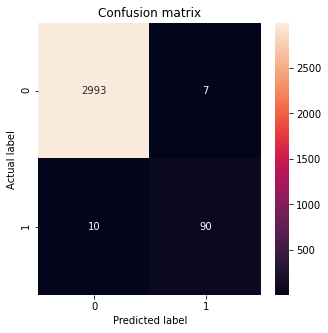

In [ ]:
res = dict(zip(model.metrics_names, results))
cm = [[int(res['tn']), int(res['fp'])],
      [int(res['fn']), int(res['tp'])]]

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

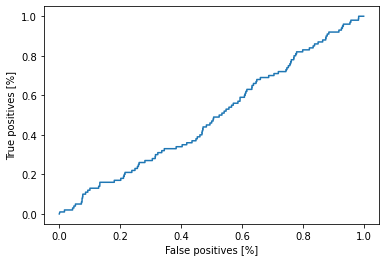

array([2.0000000e+00, 1.0000000e+00, 9.9999988e-01, 9.9999976e-01,
       9.9999964e-01, 9.9999905e-01, 9.9999881e-01, 9.9974757e-01,
       9.9970776e-01, 7.3951282e-02, 7.2242841e-02, 3.8399097e-02,
       3.6961790e-02, 2.4111800e-02, 2.2920661e-02, 7.7747367e-03,
       7.6330411e-03, 6.6482821e-03, 6.5222397e-03, 6.4775413e-03,
       6.3193510e-03, 5.7418100e-03, 5.7183243e-03, 5.5133039e-03,
       5.4909638e-03, 3.9451635e-03, 3.9036789e-03, 2.8282364e-03,
       2.7924587e-03, 2.1724736e-03, 2.1422724e-03, 8.4295031e-04,
       8.3435571e-04, 7.3522661e-04, 7.3236373e-04, 7.2555174e-04,
       7.2360650e-04, 2.7495518e-04, 2.7452060e-04, 1.7413789e-04,
       1.7280126e-04, 1.4773855e-04, 1.4753822e-04, 1.4099934e-04,
       1.4073566e-04, 1.3245523e-04, 1.3202737e-04, 9.0228838e-05,
       8.9997768e-05, 7.3316973e-05, 7.3277333e-05, 6.4982974e-05,
       6.4927845e-05, 6.3244457e-05, 6.2966676e-05, 5.9801187e-05,
       5.9747203e-05, 4.4285040e-05, 4.3946082e-05, 3.0306657e

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(test_labels, test_predictions,pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel('False positives [%]')
plt.ylabel('True positives [%]')
plt.show()
threshold

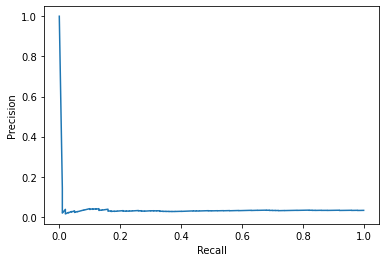

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(test_labels, test_predictions)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()